<a href="https://colab.research.google.com/github/leaderman77/MarketBasketRFMAnalysis/blob/main/Customer_Segmentation_with_clustering_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tasks
1.	Data Understanding
2.	Perform RFM Segmentation in SQL
3.	Customer segmentation with DBSCAN
4.	Review of Results
5.	Data Mart Design

# Data Understanding and distribution

In [ ]:
!pip install squarify
!pip install kneed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv('/content/Basket_dataset.csv')

In [ ]:
df.head(10)

Member_number        Date   itemDescription
0           1808  21/07/2015    tropical fruit
1           2552  05/01/2015        whole milk
2           2300  19/09/2015         pip fruit
3           1187  12/12/2015  other vegetables
4           3037  01/02/2015        whole milk
5           4941  14/02/2015        rolls/buns
6           4501  08/05/2015  other vegetables
7           3803  23/12/2015        pot plants
8           2762  20/03/2015        whole milk
9           4119  12/02/2015    tropical fruit

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


Text(0, 0.5, 'Count')

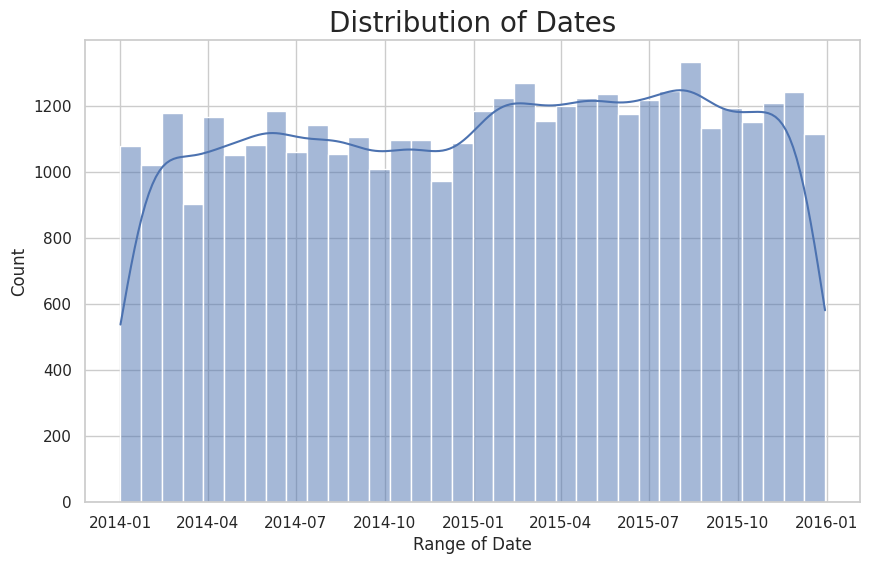

In [ ]:
#Distribution of transactions over time
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.histplot(df['Date'], kde=True)
plt.title('Distribution of Dates', fontsize = 20)
plt.xlabel('Range of Date')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

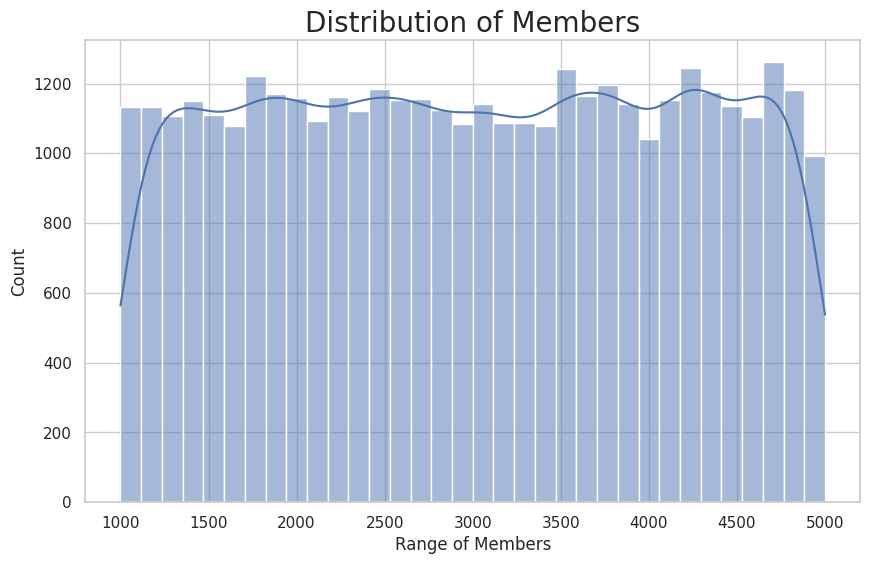

In [ ]:
# Distribution of members
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.histplot(df['Member_number'], kde=True)
plt.title('Distribution of Members', fontsize = 20)
plt.xlabel('Range of Members')
plt.ylabel('Count')

In [ ]:
df['Member_number'].value_counts(ascending=False)

Member_number
3180    36
3737    33
3050    33
2051    33
2625    31
        ..
2503     2
3301     2
1775     2
3723     2
2417     2
Name: count, Length: 3898, dtype: int64

In [ ]:
# # Count transactions per member
# transactions_per_member = df['Member_number'].value_counts()

# plt.figure(figsize=(10, 6))
# sns.histplot(transactions_per_member, kde=True)
# plt.title('Distribution of Member')
# plt.xlabel('Range of Customer')
# plt.ylabel('Count')
# plt.show()

In [ ]:
# transactions_per_member.value_counts()

# Statistical Exploration

In [ ]:
df.describe(include='all')

Member_number                           Date itemDescription
count    38765.000000                          38765           38765
unique            NaN                            NaN             167
top               NaN                            NaN      whole milk
freq              NaN                            NaN            2502
mean      3003.641868  2015-01-09 18:17:12.498387712             NaN
min       1000.000000            2014-01-01 00:00:00             NaN
25%       2002.000000            2014-07-12 00:00:00             NaN
50%       3005.000000            2015-01-21 00:00:00             NaN
75%       4007.000000            2015-07-10 00:00:00             NaN
max       5000.000000            2015-12-30 00:00:00             NaN
std       1153.611031                            NaN             NaN

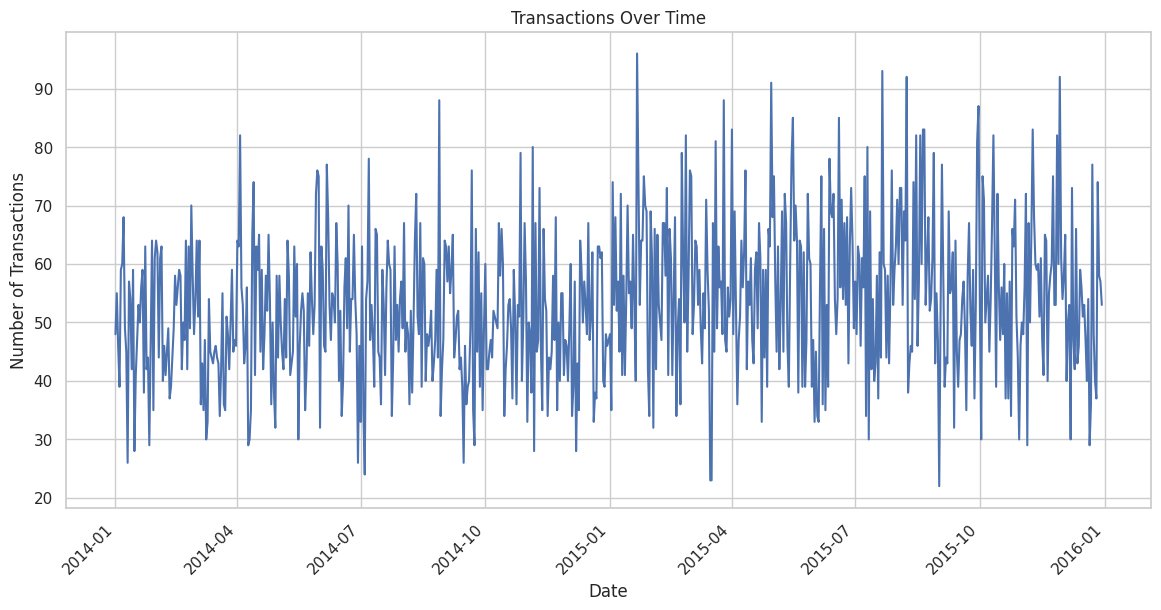

In [ ]:
# copy df
df_date = df.copy()

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Count transactions per day
transactions_per_day = df_date.groupby('Date').size()

# Plot the distribution of transactions over time
plt.figure(figsize=(14, 7))
transactions_per_day.plot(kind='line', title='Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
df['itemDescription'].value_counts(10)

itemDescription
whole milk               0.064543
other vegetables         0.048962
rolls/buns               0.044267
soda                     0.039056
yogurt                   0.034412
                           ...   
rubbing alcohol          0.000129
bags                     0.000103
baby cosmetics           0.000077
kitchen utensil          0.000026
preservation products    0.000026
Name: proportion, Length: 167, dtype: float64

In [ ]:
df['Date'].value_counts().head(10)

Date
2015-01-21    96
2015-07-21    93
2015-11-29    92
2015-08-08    92
2015-04-30    91
2014-08-28    88
2015-03-26    88
2015-09-30    87
2015-06-19    85
2015-05-16    85
Name: count, dtype: int64

<ipython-input-17-6ecff1397df7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')


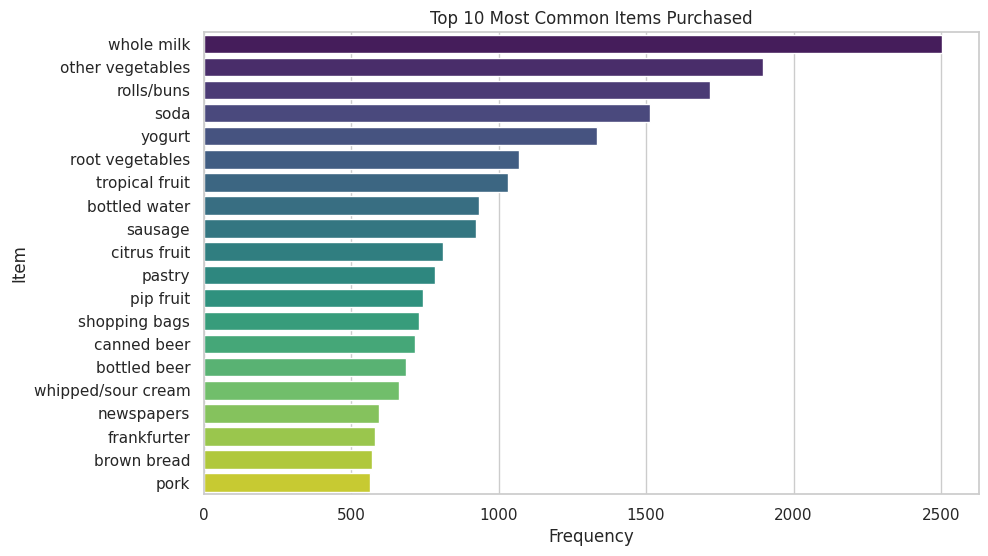

In [ ]:
# Get the top 10 most common items
top_items = df['itemDescription'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')
plt.title('Top 10 Most Common Items Purchased')
plt.xlabel('Frequency')
plt.ylabel('Item')
plt.show()

In [ ]:
weekly_sales = df.resample('w', on='Date').size()
fig = px.line(df, x=weekly_sales.index, y=weekly_sales,
              labels={'y': 'Number of Sales',
                     'x': 'Date'})
fig.update_layout(title_text='Number of Weekly Sales',
                  title_x=0.5, title_font=dict(size=18))
fig.show()

In [ ]:
unique_weekly_member = df.resample('w', on='Date').Member_number.nunique()
fig = px.line(unique_weekly_member, x=unique_weekly_member.index, y=unique_weekly_member,
              labels={'y': 'Number of Member'})
fig.update_layout(title_text='Number of Weekly Members',
                  title_x=0.5, title_font=dict(size=18))
fig.show()

In [ ]:
sales_per_member = weekly_sales / unique_weekly_member
fig = px.line(sales_per_member, x=sales_per_member.index, y=sales_per_member,
              labels={'y': 'Sales per Member Ratio'})
fig.update_layout(title_text='Sales per Member Weekly',
                  title_x=0.5, title_font=dict(size=18))
fig.update_yaxes(rangemode="tozero")
fig.show()

In [ ]:
frequency_of_items = df.groupby(pd.Grouper(key='itemDescription')).size().reset_index(name='count')
fig = px.treemap(frequency_of_items, path=['itemDescription'], values='count')
fig.update_layout(title_text='Frequency of the Items Sold',
                  title_x=0.5, title_font=dict(size=18)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

In [ ]:
df.Member_number = df['Member_number'].astype('str')
user_item = df.groupby(pd.Grouper(key='Member_number')).size().reset_index(name='count') \
    .sort_values(by='count', ascending=False)
fig = px.bar(user_item.head(10), x='Member_number', y='count',
             labels={'y': 'Number of Sales',
                     'count': 'Number of Items Bought'},
             color='count')
fig.update_layout(title_text='Top 10 Members regarding Number of Items Bought',
                  title_x=0.5, title_font=dict(size=16))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.show()

In [ ]:
day = df.groupby(df['Date'].dt.strftime('%A'))['itemDescription'].count()
fig = px.bar(day, x=day.index, y=day, color=day,
             labels={'y': 'Number of Sales',
                     'Date': 'Week Days'})
fig.update_layout(title_text='Number of Sales per Discrete Week Days',
                  title_x=0.5, title_font=dict(size=16))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.show()

In [ ]:
month = df.groupby(df['Date'].dt.strftime('%m'))['itemDescription'].count()
fig = px.bar(month, x=month.index, y=month, color=month,
             labels={'y': 'Number of Sales',
                     'Date': 'Months'})
fig.update_layout(title_text='Number of Sales per Discrete Months',
                  title_x=0.5, title_font=dict(size=18))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.show()

In [ ]:
month_day = df.groupby(df['Date'].dt.strftime('%d'))['itemDescription'].count()
fig = px.bar(month_day, x=month_day.index, y=month_day, color=month_day,
             labels={'y': 'Number of Sales',
                     'Date': 'Month Days'})
fig.update_layout(title_text='Number of Sales per Discrete Month Days',
                  title_x=0.5, title_font=dict(size=16))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.show()

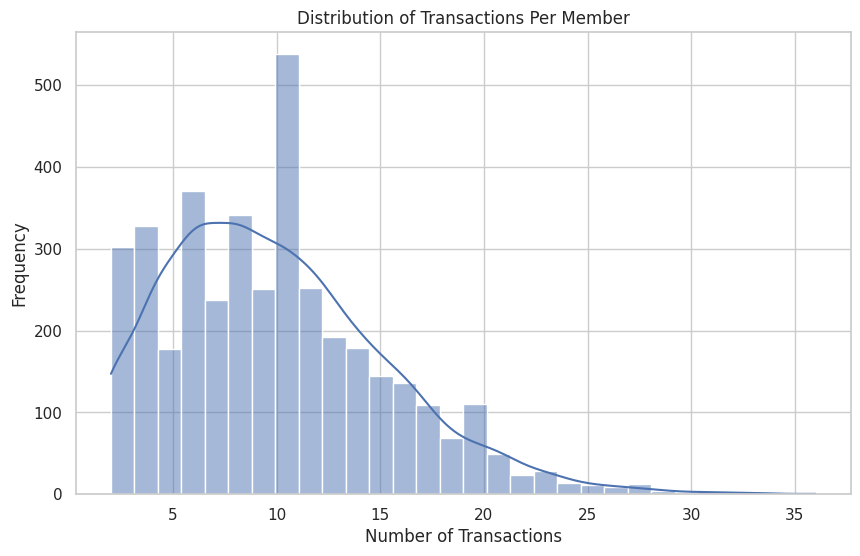

In [ ]:
# Count transactions per member
transactions_per_member = df['Member_number'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(transactions_per_member, bins=30, kde=True)
plt.title('Distribution of Transactions Per Member')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

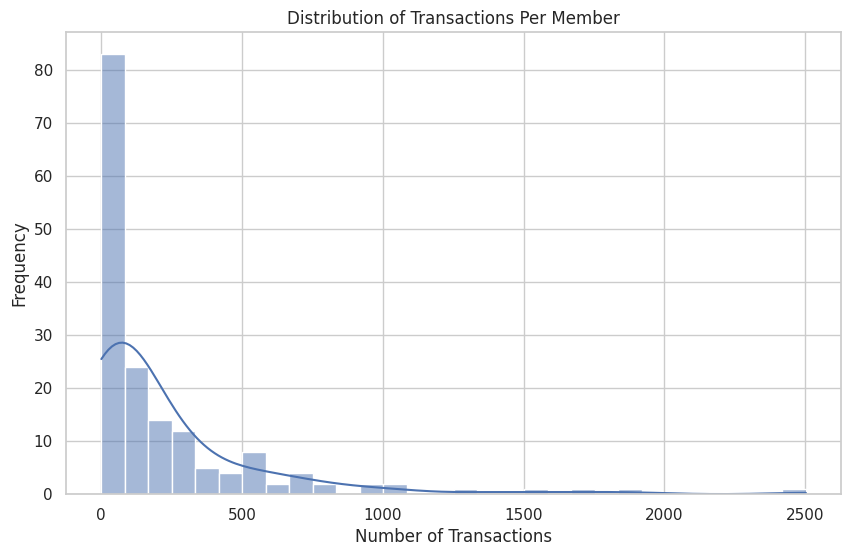

In [ ]:
transactions_per_member = df['itemDescription'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(transactions_per_member, bins=30, kde=True)
plt.title('Distribution of Transactions Per Member')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Summary statistics for `Date`
print("Earliest Date:", df['Date'].min())
print("Latest Date:", df['Date'].max())
print("Number of Unique Days:", df['Date'].nunique())

Earliest Date: 2014-01-01 00:00:00
Latest Date: 2015-12-30 00:00:00
Number of Unique Days: 728


In [ ]:
# Number of unique items
print("Number of Unique Items:", df['itemDescription'].nunique())

# Average number of times an item is purchased
print("Average Purchases per Item:", df['itemDescription'].value_counts().mean())

# Standard deviation of purchases per item
print("SD of Purchases per Item:", df['itemDescription'].value_counts().std())

Number of Unique Items: 167
Average Purchases per Item: 232.125748502994
SD of Purchases per Item: 363.4420982644306


In [ ]:
transactions_per_member = df['Member_number'].value_counts()

print("Average Number of Transactions per Member:", transactions_per_member.mean())
print("Median Number of Transactions per Member:", transactions_per_member.median())
print("Standard Deviation of Transactions per Member:", transactions_per_member.std())

Average Number of Transactions per Member: 9.944843509492047
Median Number of Transactions per Member: 9.0
Standard Deviation of Transactions per Member: 5.310795850646273


In [ ]:
# df['Epoch_Time'] = (df['Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
# df

Missing Values

In [ ]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  object        
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 908.7+ KB


In [ ]:
print("Unique values in the categorical feature:", df['itemDescription'].unique())

Unique values in the categorical feature: ['tropical fruit' 'whole milk' 'pip fruit' 'other vegetables' 'rolls/buns'
 'pot plants' 'citrus fruit' 'beef' 'frankfurter' 'chicken' 'butter'
 'fruit/vegetable juice' 'packaged fruit/vegetables' 'chocolate'
 'specialty bar' 'butter milk' 'bottled water' 'yogurt' 'sausage'
 'brown bread' 'hamburger meat' 'root vegetables' 'pork' 'pastry'
 'canned beer' 'berries' 'coffee' 'misc. beverages' 'ham' 'turkey'
 'curd cheese' 'red/blush wine' 'frozen potato products' 'flour' 'sugar'
 'frozen meals' 'herbs' 'soda' 'detergent' 'grapes' 'processed cheese'
 'fish' 'sparkling wine' 'newspapers' 'curd' 'pasta' 'popcorn'
 'finished products' 'beverages' 'bottled beer' 'dessert' 'dog food'
 'specialty chocolate' 'condensed milk' 'cleaner' 'white wine' 'meat'
 'ice cream' 'hard cheese' 'cream cheese ' 'liquor' 'pickled vegetables'
 'liquor (appetizer)' 'UHT-milk' 'candy' 'onions' 'hair spray'
 'photo/film' 'domestic eggs' 'margarine' 'shopping bags' 'salt' 'oi

# Building RFM model using SQLite3 and Calculating RFM table

In [ ]:
import sqlite3 as sql3

In [ ]:
# copy cleaned data
df_Fact = df.copy()
# connect to database
conn = sql3.connect("RFMdb")
cur = conn.cursor()

In [ ]:
# load CRM data into the RFMdb database
df_Fact.to_sql("data", conn, if_exists='replace', index=False)

# CHECK IF DATA INSERTED INTO data/RFMdb
df_Fact = pd.read_sql('SELECT * FROM data', conn)
df_Fact

Member_number                 Date        itemDescription
0              1808  2015-07-21 00:00:00         tropical fruit
1              2552  2015-01-05 00:00:00             whole milk
2              2300  2015-09-19 00:00:00              pip fruit
3              1187  2015-12-12 00:00:00       other vegetables
4              3037  2015-02-01 00:00:00             whole milk
...             ...                  ...                    ...
38760          4471  2014-10-08 00:00:00          sliced cheese
38761          2022  2014-02-23 00:00:00                  candy
38762          1097  2014-04-16 00:00:00               cake bar
38763          1510  2014-12-03 00:00:00  fruit/vegetable juice
38764          1521  2014-12-26 00:00:00               cat food

[38765 rows x 3 columns]

In [ ]:
# clean data and group transactions by Customerid
cleandata= pd.read_sql('''
SELECT Member_number,
       MAX(Date) AS last_order_date,
       COUNT(DISTINCT(Date)) AS count_order,
       COUNT(itemDescription) AS num_items
FROM data
GROUP BY Member_number ''', conn)
# Write clean CRM data into the database
cleandata.to_sql("cleandata", conn)

3898

In [ ]:
cleandata.head(10)

Member_number      last_order_date  count_order  num_items
0          1000  2015-11-25 00:00:00            5         13
1          1001  2015-05-02 00:00:00            5         12
2          1002  2015-08-30 00:00:00            4          8
3          1003  2015-02-10 00:00:00            4          8
4          1004  2015-12-02 00:00:00            8         21
5          1005  2014-01-23 00:00:00            2          4
6          1006  2015-06-14 00:00:00            4         15
7          1008  2015-10-03 00:00:00            2         12
8          1009  2015-10-05 00:00:00            4          9
9          1010  2015-07-31 00:00:00            5         12

In [ ]:
df_Fact2 = pd.read_sql('SELECT * FROM cleandata', conn)
df_Fact2

index Member_number      last_order_date  count_order  num_items
0         0          1000  2015-11-25 00:00:00            5         13
1         1          1001  2015-05-02 00:00:00            5         12
2         2          1002  2015-08-30 00:00:00            4          8
3         3          1003  2015-02-10 00:00:00            4          8
4         4          1004  2015-12-02 00:00:00            8         21
...     ...           ...                  ...          ...        ...
3893   3893          4996  2015-11-24 00:00:00            3         10
3894   3894          4997  2015-12-27 00:00:00            2          6
3895   3895          4998  2015-10-14 00:00:00            1          2
3896   3896          4999  2015-12-26 00:00:00            6         16
3897   3897          5000  2015-02-10 00:00:00            3          7

[3898 rows x 5 columns]

In [ ]:
print(df_Fact2.dtypes)

index               int64
Member_number      object
last_order_date    object
count_order         int64
num_items           int64
dtype: object


In [ ]:
df_Fact2['last_order_date'] = pd.to_datetime(df_Fact2['last_order_date'])

In [ ]:
print(df_Fact2.dtypes)

index                       int64
Member_number              object
last_order_date    datetime64[ns]
count_order                 int64
num_items                   int64
dtype: object


In [ ]:
# get only date part from datetime feature column
df_Fact2["last_order_date"] = df_Fact2["last_order_date"].dt.date

In [ ]:
# Create snapshot date
snapshot_date = df_Fact2['last_order_date'].max() + datetime.timedelta(days=1)
snapshot_date

datetime.date(2015, 12, 31)

In [ ]:
# Aggregate data by each customer
members = df_Fact2.groupby(['Member_number']).agg({
   'last_order_date': lambda x: (snapshot_date - x.max()).days,
   'count_order':'sum' ,
   'num_items': 'sum'})

In [ ]:
# Rename columns
members.rename(columns = {'last_order_date': 'Recency',
                          'count_order': 'Frequency',
                          'num_items': 'MonetaryValue'}, inplace=True)

In [ ]:
members

Recency  Frequency  MonetaryValue
Member_number                                   
1000                36          5             13
1001               243          5             12
1002               123          4              8
1003               324          4              8
1004                29          8             21
...                ...        ...            ...
4996                37          3             10
4997                 4          2              6
4998                78          1              2
4999                 5          6             16
5000               324          3              7

[3898 rows x 3 columns]

Text(0.5, 1.0, 'Histogram and Recency')

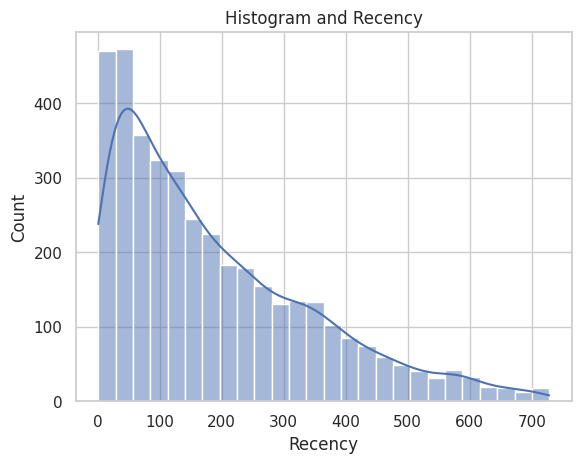

In [ ]:
fig, ax = plt.subplots()
sns.histplot(data=members, x='Recency', kde=True)
ax.set_title('Histogram and Recency')

Text(0.5, 1.0, 'Histogram and Frequency')

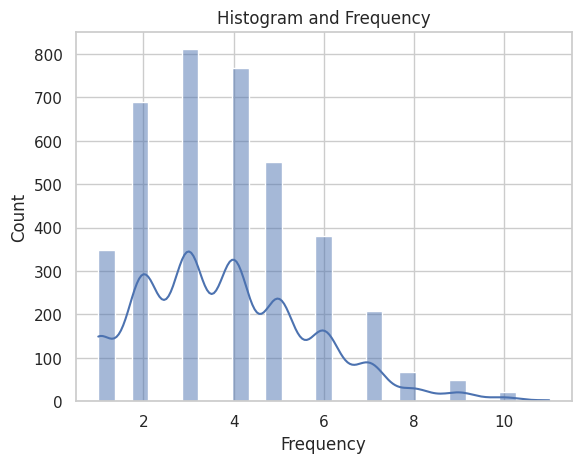

In [ ]:
#distrubution analysis for frequency
fig, ax = plt.subplots()
sns.histplot(data=members, x='Frequency', kde=True)
ax.set_title('Histogram and Frequency')

Text(0.5, 1.0, 'Histogram and MonetaryValue')

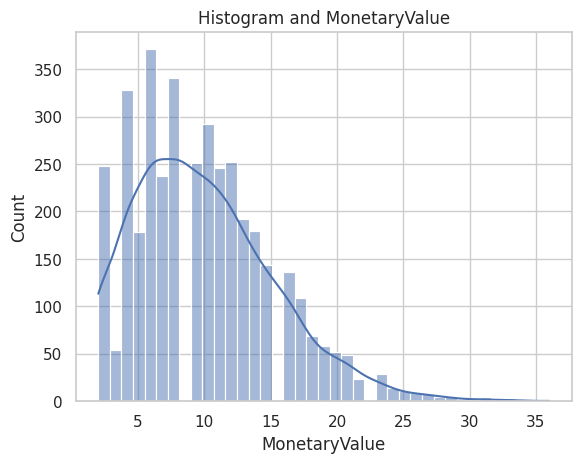

In [ ]:
#distrubution analysis for monetaryvalue
fig, ax = plt.subplots()
sns.histplot(data=members, x='MonetaryValue', kde=True)
ax.set_title('Histogram and MonetaryValue')

In [ ]:
df_Fact2.dtypes

index               int64
Member_number      object
last_order_date    object
count_order         int64
num_items           int64
dtype: object

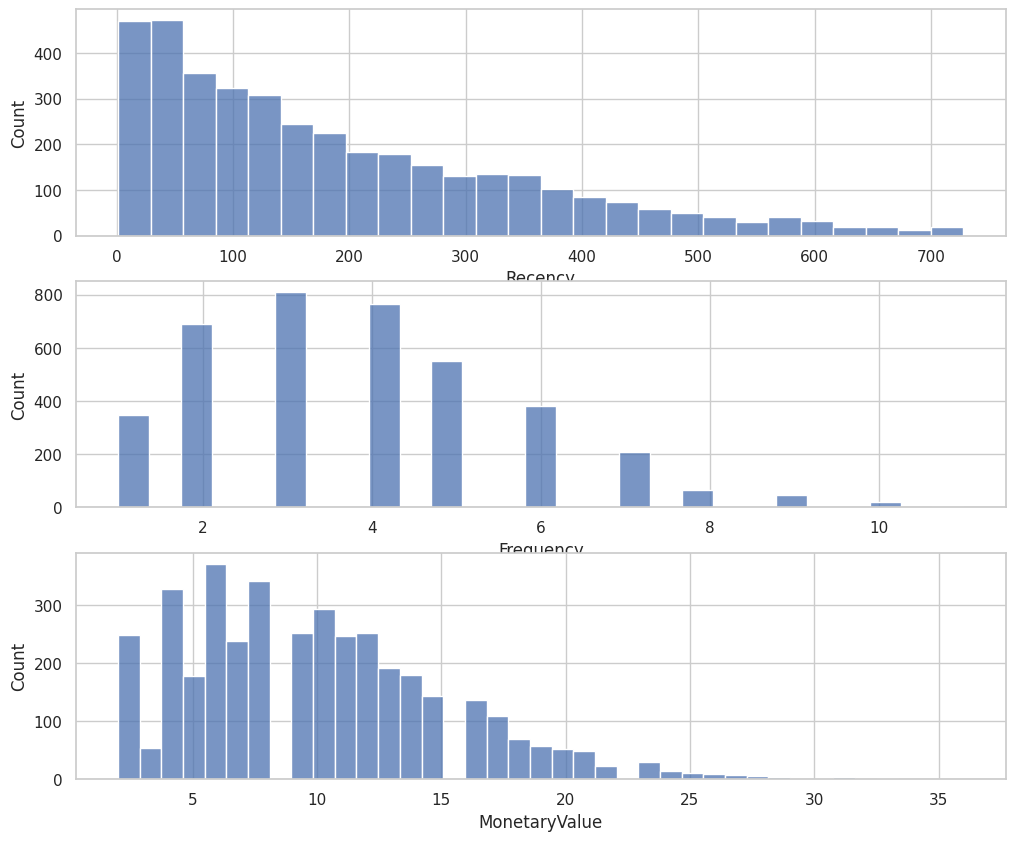

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.histplot(members['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.histplot(members['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.histplot(members['MonetaryValue'])
# Show the plot
plt.show()

In [ ]:
members.head(10)

Recency  Frequency  MonetaryValue
Member_number                                   
1000                36          5             13
1001               243          5             12
1002               123          4              8
1003               324          4              8
1004                29          8             21
1005               707          2              4
1006               200          4             15
1008                89          2             12
1009                87          4              9
1010               153          5             12

# RFM Segmentation and Visuallization

In [ ]:
#clean the data and calculate rfm values
df_Fact = pd.read_sql('''
SELECT Member_number,
       rfm_recency,
       rfm_frequency,
       rfm_monetary,
       rfm_recency*100 +rfm_frequency*10 + rfm_monetary AS rfm_combined
FROM
  ( SELECT Member_number,
           NTILE(4) OVER (ORDER BY last_order_date) AS rfm_recency,
           NTILE(4) OVER (ORDER BY count_order) AS rfm_frequency,
           NTILE(4) OVER (ORDER BY num_items) AS rfm_monetary
    FROM
      cleandata)
''', conn)
df_Fact

Member_number  rfm_recency  rfm_frequency  rfm_monetary  rfm_combined
0             2717            1              1             1           111
1             3243            1              1             1           111
2             4247            1              1             1           111
3             3376            1              1             1           111
4             1243            1              1             1           111
...            ...          ...            ...           ...           ...
3893          3971            4              4             4           444
3894          2997            4              4             4           444
3895          3562            4              4             4           444
3896          2810            4              4             4           444
3897          1509            4              4             4           444

[3898 rows x 5 columns]

In [ ]:
import matplotlib.pyplot as plt

def rfm_level(df_Fact):
  if ((df_Fact['rfm_recency'] >= 4)
      and (df_Fact['rfm_frequency'] >= 4)
      and (df_Fact['rfm_monetary'] >= 4)):
    return 'Best Customers'
  elif ((df_Fact['rfm_recency'] >= 3)
      and (df_Fact['rfm_frequency'] >= 3)
      and (df_Fact['rfm_monetary'] >= 3)):
    return 'Loyal'
  elif ((df_Fact['rfm_recency'] >= 3)
      and (df_Fact['rfm_frequency'] >= 1)
      and (df_Fact['rfm_monetary'] >= 2)):
    return 'Potential Loyalist'
  elif ((df_Fact['rfm_recency'] >= 3)
      and (df_Fact['rfm_frequency'] >= 1)
      and (df_Fact['rfm_monetary'] >= 1)):
    return 'Promising'
  elif ((df_Fact['rfm_recency'] >= 2)
      and (df_Fact['rfm_frequency'] >= 2)
      and (df_Fact['rfm_monetary'] >= 2)):
    return 'Customers Needing Attention'
  elif ((df_Fact['rfm_recency'] >= 1)
      and (df_Fact['rfm_frequency'] >= 2)
      and (df_Fact['rfm_monetary'] >= 2)):
    return 'At Risk'
  elif ((df_Fact['rfm_recency'] >= 1)
      and (df_Fact['rfm_frequency'] >= 1)
      and (df_Fact['rfm_monetary'] >= 2)):
    return 'Hibernating'
  else:
    return 'Lost'

In [ ]:
#Create a new variable rfm_level
df_Fact['rfm_level'] = df_Fact.apply(rfm_level, axis=1)
df_Fact.tail(50)

Member_number  rfm_recency  rfm_frequency  rfm_monetary  rfm_combined  \
3848          3209            4              3             3           433   
3849          2879            4              4             3           443   
3850          1086            4              4             4           444   
3851          2764            4              4             3           443   
3852          4091            4              4             4           444   
3853          1997            4              4             4           444   
3854          4719            4              4             4           444   
3855          2222            4              4             4           444   
3856          2447            4              4             4           444   
3857          4010            4              1             2           412   
3858          4095            4              2             2           422   
3859          3118            4              2             2           422   
3860          4285            4              3             2           432   
3861          1165            4              3             2           432   
3862          4037            4              3             3           433   
3863          4199            4              3             3           433   
3864          1358            4              3             3           433   
3865          2309            4              3             3           433   
3866          4352            4              3             4           434   
3867          2563            4              3             4           434   
3868          2825            4              3             3           433   
3869          2836            4              3             3           433   
3870          3369            4              4             4           444   
3871          3633            4              4             4           444   
3872          1220            4              4             4           444   
3873          3363            4              4             3           443   
3874          2448            4              4             4           444   
3875          1444            4              4             4           444   
3876          3306            4              4             4           444   
3877          1218            4              4             4           444   
3878          4645            4              4             4           444   
3879          1963            4              1             1           411   
3880          4565            4              1             1           411   
3881          4863            4              1             1           411   
3882          1769            4              1             1           411   
3883          3191            4              1             1           411   
3884          2970            4              1             2           412   
3885          2140            4              2             1           421   
3886          4058            4              2             2           422   
3887          2790            4              2             2           422   
3888          3738            4              3             3           433   
3889          2507            4              3             3           433   
3890          1491            4              3             3           433   
3891          3579            4              4             3           443   
3892          1527            4              4             4           444   
3893          3971            4              4             4           444   
3894          2997            4              4             4           444   
3895          3562            4              4             4           444   
3896          2810            4              4             4           444   
3897          1509            4              4             4           444   

               rfm_level  

In [ ]:
# Calculate total customers in each segment
rfm_agg = df_Fact.groupby('rfm_level').agg({'Member_number':'count'})
print(rfm_agg)

                             Member_number
rfm_level                                 
At Risk                                444
Best Customers                         371
Customers Needing Attention            716
Hibernating                             69
Lost                                   721
Loyal                                  812
Potential Loyalist                     511
Promising                              254


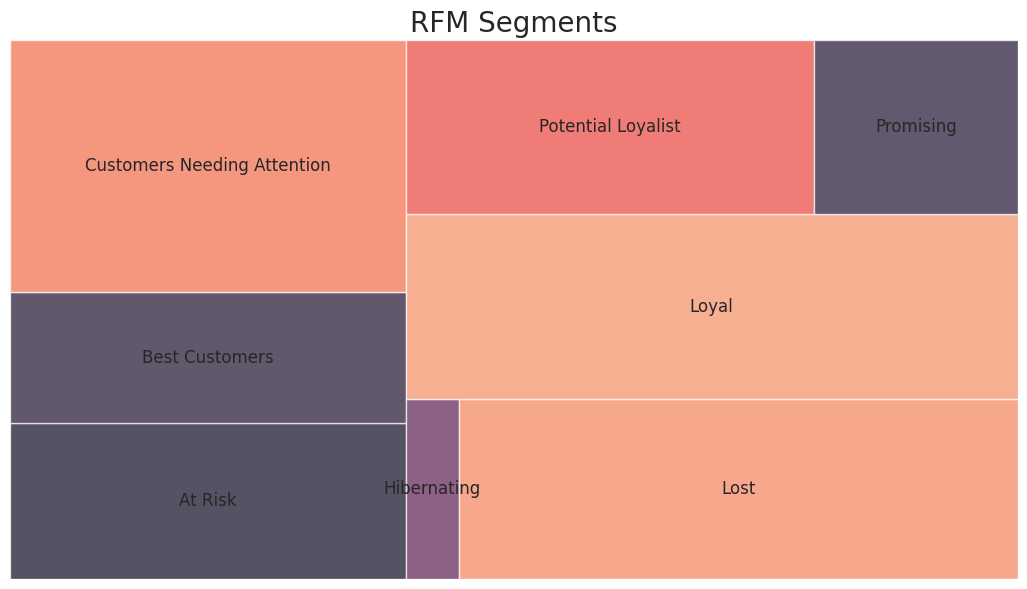

In [ ]:
#RFM visualization, you may have to install squarify
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(13, 7)
squarify.plot(sizes=rfm_agg['Member_number'],
              label=['At Risk',
                     'Best Customers',
                     'Customers Needing Attention',
                     'Hibernating','Lost','Loyal',
                     'Potential Loyalist',
                     'Promising'], alpha=0.7)
plt.title("RFM Segments",fontsize=20)
plt.axis('off')
plt.show()

In [ ]:
# import plotly.express as px

# fig = px.box(members, y = ['Frequency', 'MonetaryValue'] )
# fig.show()

In [ ]:
# #outlier treatment: We will delete everything outside the IQR

# Q1 = members.MonetaryValue.quantile(0.25)
# Q3 = members.MonetaryValue.quantile(0.75)
# IQR = Q3 - Q1
# RFM = members[(members.MonetaryValue >= (Q1 - 1.5*IQR)) & (members.MonetaryValue <= (Q1 + 1.5 * IQR))]

In [ ]:
# #outlier treatment : We will delete everything outside the IQR

# Q1 = RFM.Frequency.quantile(0.25)
# Q3 = RFM.Frequency.quantile(0.75)
# IQR = Q3 - Q1
# RFM = RFM[(RFM.Frequency >= (Q1 - 1.5*IQR)) & (RFM.Frequency <= (Q1 + 1.5 * IQR))]

In [ ]:
# fig = px.box(RFM, y = ['Frequency', 'MonetaryValue'] )
# fig.show()

In [ ]:
# fig = px.box(RFM, y = [ 'Recency'] )
# fig.show()

In [ ]:
# #outlier treatment : We will delete everything outside the IQR

# Q1 = RFM.Recency.quantile(0.25)
# Q3 = RFM.Recency.quantile(0.75)
# IQR = Q3 - Q1
# RFM = RFM[(RFM.Recency >= (Q1 - 1.5*IQR)) & (RFM.Recency <= (Q1 + 1.5 * IQR))]

In [ ]:
# fig = px.box(RFM, y = [ 'Recency'] )
# fig.show()

# Plot data to understand RFM distribution before fitting the data using DBSCAN model

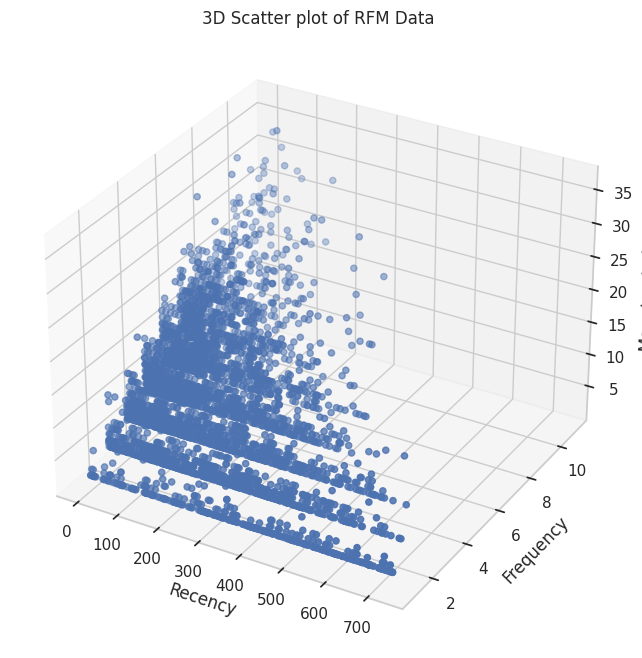

In [ ]:
RFM = members.copy()
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

# Plotting each data point in the 3D space
ax.scatter(RFM['Recency'], RFM['Frequency'], RFM['MonetaryValue'])

# Set labels for axes
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('MonetaryValue')

# Set the title of the plot
plt.title('3D Scatter plot of RFM Data')

# Show the plot
plt.show()

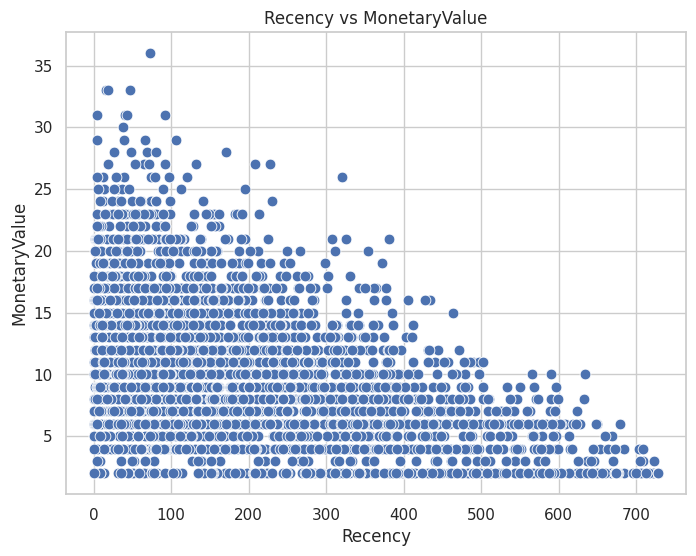

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Recency',y = 'MonetaryValue', data = members  ,s = 60 )
plt.xlabel('Recency')
plt.ylabel('MonetaryValue')
plt.title('Recency vs MonetaryValue')
plt.show()

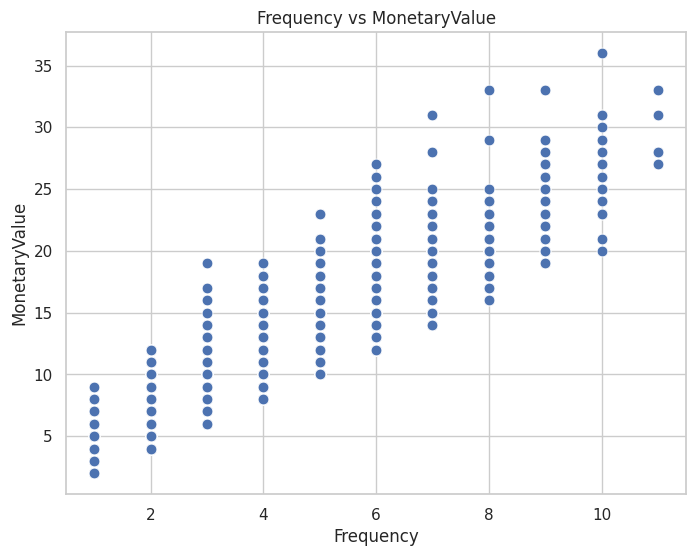

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Frequency',y = 'MonetaryValue', data = members  ,s = 60 )
plt.xlabel('Frequency')
plt.ylabel('MonetaryValue')
plt.title('Frequency vs MonetaryValue')
plt.show()

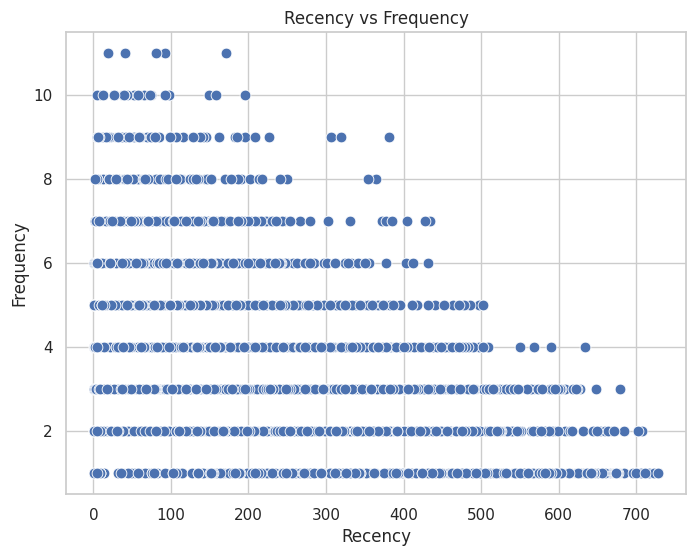

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Recency',y = 'Frequency', data = members  ,s = 60 )
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency')
plt.show()

In [ ]:
members

Recency  Frequency  MonetaryValue
Member_number                                   
1000                36          5             13
1001               243          5             12
1002               123          4              8
1003               324          4              8
1004                29          8             21
...                ...        ...            ...
4996                37          3             10
4997                 4          2              6
4998                78          1              2
4999                 5          6             16
5000               324          3              7

[3898 rows x 3 columns]

In [ ]:
# RFM = RFM.drop(['Member_number'], axis=1)

RFM = members.copy()
RFM
# from sklearn.preprocessing import StandardScaler
# # Initialize the Object
# standard_scaler = StandardScaler()
# # Fit the data
# RFM = standard_scaler.fit_transform(RFM)

# RFM = pd.DataFrame(data = RFM, columns = ['Recency', 'Frequency', 'MonetaryValue'])
# RFM

Recency  Frequency  MonetaryValue
Member_number                                   
1000                36          5             13
1001               243          5             12
1002               123          4              8
1003               324          4              8
1004                29          8             21
...                ...        ...            ...
4996                37          3             10
4997                 4          2              6
4998                78          1              2
4999                 5          6             16
5000               324          3              7

[3898 rows x 3 columns]

# Build DBSCAN Model with random eps and min_samples

In [ ]:
# Testing DBSCAN with initial random eps and min_samples values
dbscan_model = DBSCAN(eps=11, min_samples=4)

dbscan_fit = dbscan_model.fit(RFM)

y_db = dbscan_fit.labels_

# Get the cluster labels
print(y_db)

# Get unique cluster labels
print(np.unique(y_db))

# Calculate silhouette score
print(silhouette_score(RFM, y_db))

RFM_1 = RFM.copy()
RFM_1["Labels"] = y_db
RFM_1["Labels"].value_counts()

[0 0 0 ... 0 0 0]
[0 1]
0.6027389466891632


Labels
0    3877
1      21
Name: count, dtype: int64

In [ ]:
#Check the sixe of each cluster
DBSCAN_clust_sizes = RFM_1.groupby('Labels').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

DBSCAN_size
Labels             
0              3877
1                21

# Refine eps and min_samples to improve the model clustering

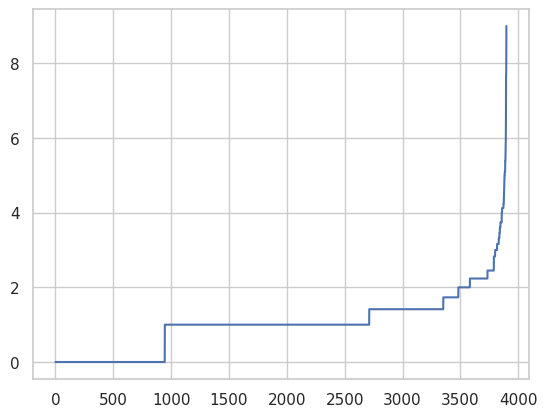

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Choose the minimum number of points you want in a cluster
min_pts = 4
neighbors = NearestNeighbors(n_neighbors=min_pts)
neighbors_fit = neighbors.fit(RFM)
distances, indices = neighbors_fit.kneighbors(RFM)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(distances)+1), y = distances, S = 1.0,
                      curve = "concave", direction = "increasing", online=True)
# get the estimate of knee point
print(kneedle.knee_y)

7.681145747868608


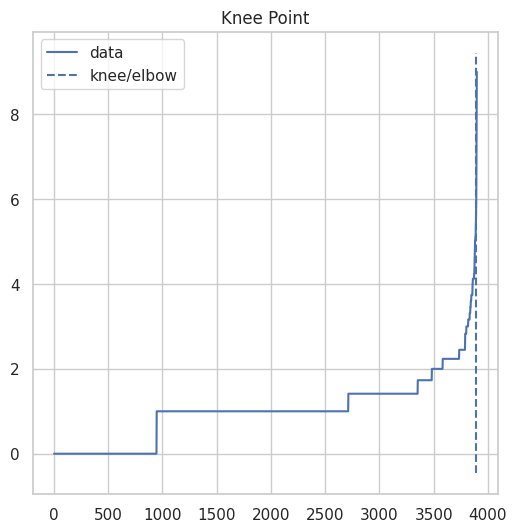

In [ ]:
kneedle.plot_knee()
plt.show()

In [ ]:
# Attempt to improve the model
dbscan_model = DBSCAN(eps=7.68, min_samples=4).fit(RFM)

y_db = dbscan_model.labels_

# Get the cluster labels
print(y_db)

# Get unique cluster labels
print(np.unique(y_db))

# Calculate silhouette score
print(silhouette_score(RFM, y_db))

RFM_DB = RFM.copy()
RFM_DB["Labels"] = y_db
RFM_DB["Labels"].value_counts()

[0 0 0 ... 0 0 0]
[-1  0  1]
-0.2172786373342408


Labels
 0    3873
 1      21
-1       4
Name: count, dtype: int64

In [ ]:
#Check the sixe of each cluster
DBSCAN_clust_sizes = RFM_DB.groupby('Labels').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

DBSCAN_size
Labels             
-1                4
 0             3873
 1               21

# Testing DBSCAN visually

In [ ]:
# Calculate silhouette score
print(silhouette_score(RFM, y_db))

-0.2172786373342408


<ipython-input-81-569dbdc6b12d>:3: UserWarning:

The palette list has more values (5) than needed (3), which may not be intended.



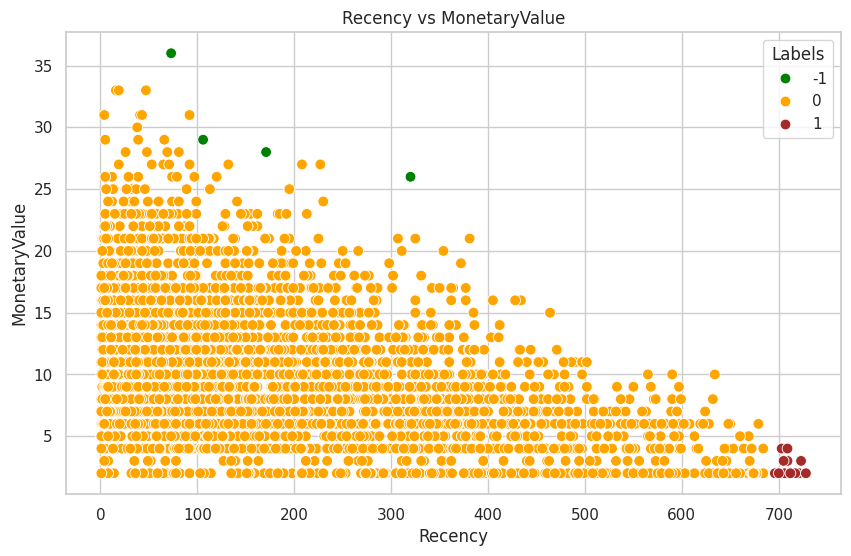

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Recency',y = 'MonetaryValue',hue="Labels",
                 palette=['green','orange','brown','dodgerblue','red'],
                legend='full',data = RFM_DB  ,s = 60 )
plt.xlabel('Recency')
plt.ylabel('MonetaryValue')
plt.title('Recency vs MonetaryValue')
plt.show()

<ipython-input-82-5666941fac30>:3: UserWarning:

The palette list has more values (5) than needed (3), which may not be intended.



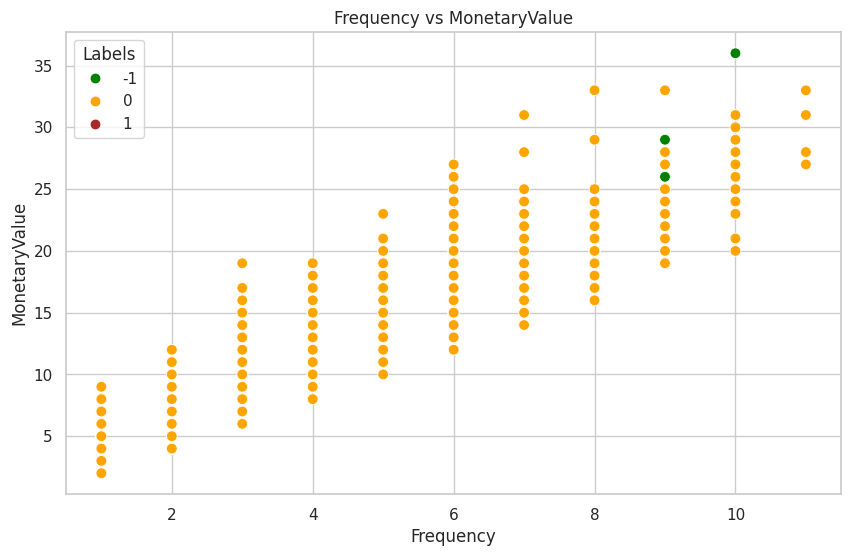

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Frequency',y = 'MonetaryValue',hue="Labels",
                 palette=['green','orange','brown','dodgerblue','red'],
                legend='full',data = RFM_DB  ,s = 60 )
plt.xlabel('Frequency')
plt.ylabel('MonetaryValue')
plt.title('Frequency vs MonetaryValue')
plt.show()

<ipython-input-83-67a2fbdb4469>:3: UserWarning:

The palette list has more values (5) than needed (3), which may not be intended.



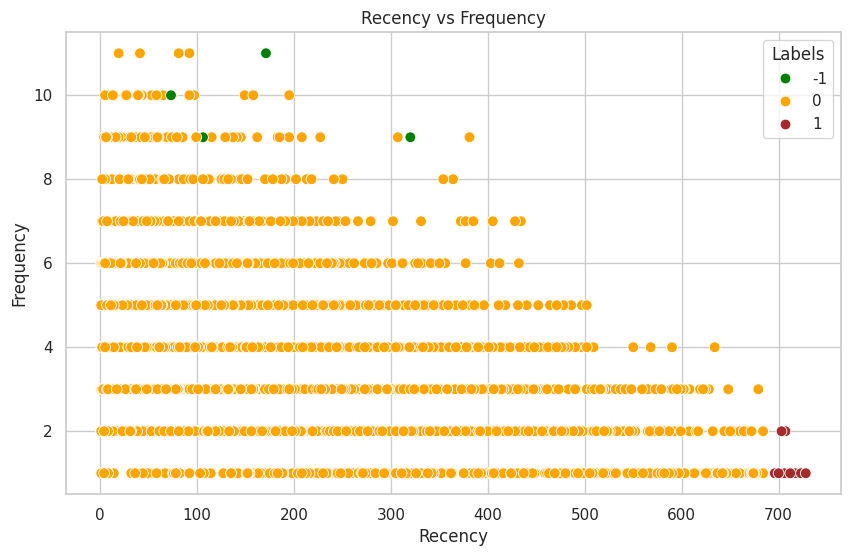

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Recency',y = 'Frequency',hue="Labels",
                 palette=['green','orange','brown','dodgerblue','red'],
                legend='full',data = RFM_DB  ,s = 60 )
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency')
plt.show()

In [ ]:
RFM_DB

Recency  Frequency  MonetaryValue  Labels
Member_number                                           
1000                36          5             13       0
1001               243          5             12       0
1002               123          4              8       0
1003               324          4              8       0
1004                29          8             21       0
...                ...        ...            ...     ...
4996                37          3             10       0
4997                 4          2              6       0
4998                78          1              2       0
4999                 5          6             16       0
5000               324          3              7       0

[3898 rows x 4 columns]

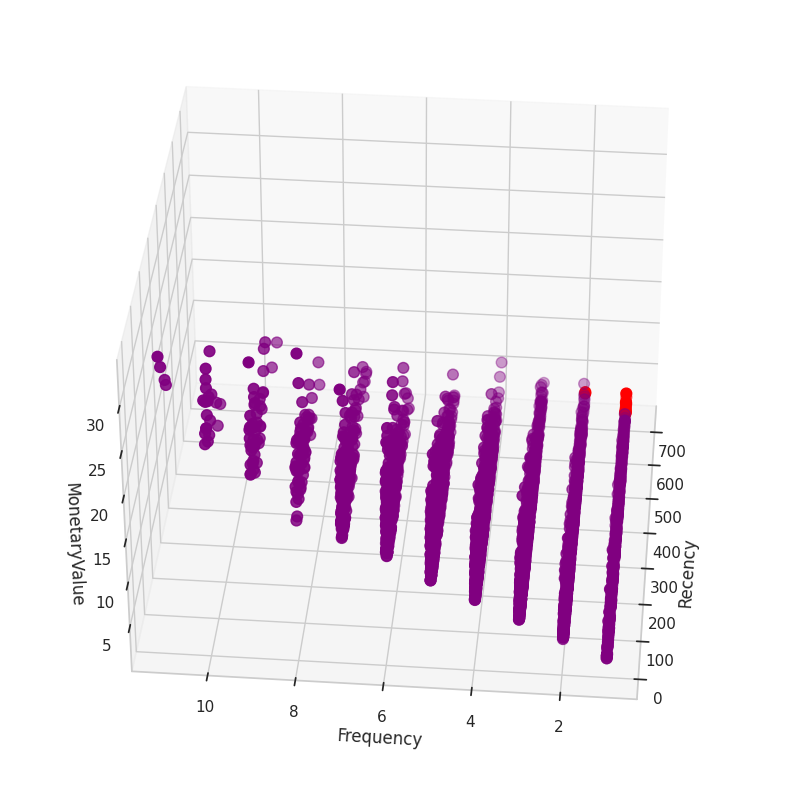

In [ ]:
df = RFM_DB.copy()
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Recency[df.Labels == 0], df["Frequency"][df.Labels == 0], df["MonetaryValue"][df.Labels == 0], c='purple', s=60)
ax.scatter(df.Recency[df.Labels == 1], df["Frequency"][df.Labels == 1], df["MonetaryValue"][df.Labels == 1], c='red', s=60)
ax.scatter(df.Recency[df.Labels == 2], df["Frequency"][df.Labels == 2], df["MonetaryValue"][df.Labels == 2], c='blue', s=60)
ax.scatter(df.Recency[df.Labels == 3], df["Frequency"][df.Labels == 3], df["MonetaryValue"][df.Labels == 3], c='green', s=60)
ax.scatter(df.Recency[df.Labels == 4], df["Frequency"][df.Labels == 4], df["MonetaryValue"][df.Labels == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Recency")
plt.ylabel("Frequency")
ax.set_zlabel('MonetaryValue')
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(RFM_DB, x='Recency', y='Frequency', z='MonetaryValue',
              color= 'Labels')
fig.show()

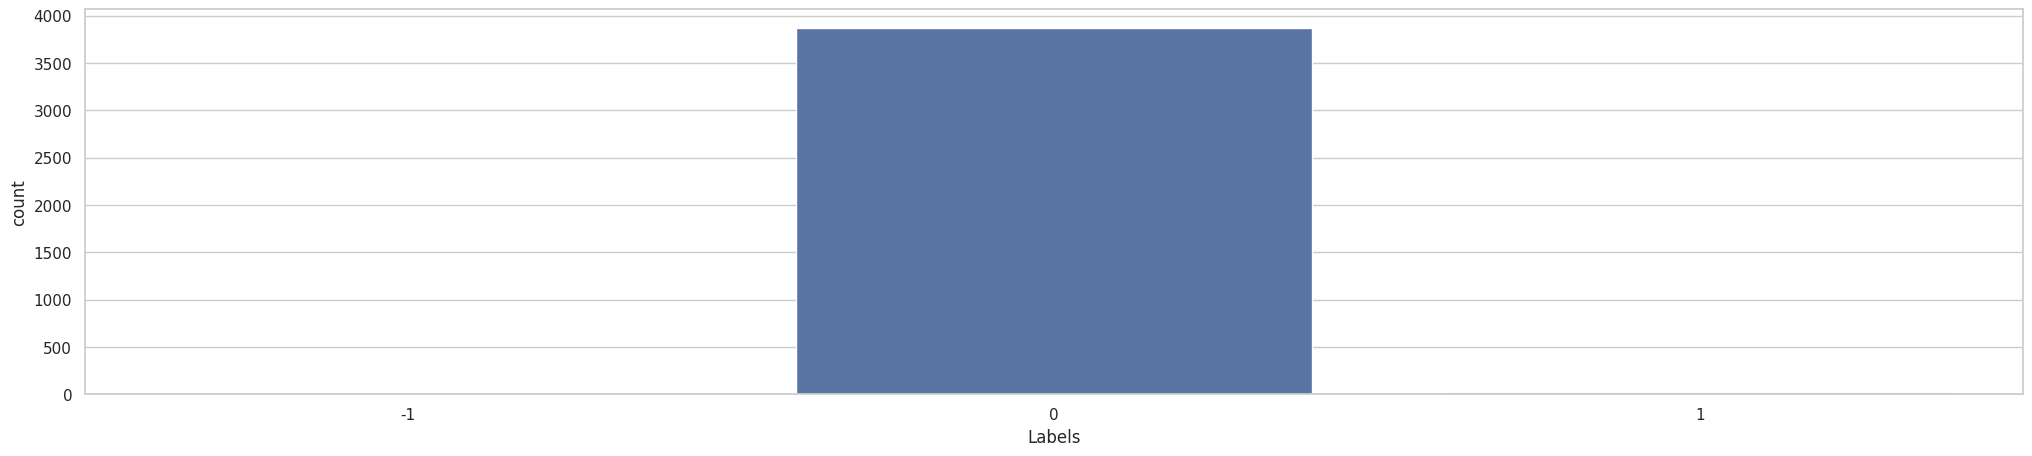

In [ ]:
RFM_DB.groupby('Labels').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="Labels", data=RFM_DB)

In [ ]:
RFM_DB.groupby(['Labels']).count()

Recency  Frequency  MonetaryValue
Labels                                   
-1            4          4              4
 0         3873       3873           3873
 1           21         21             21

In [ ]:
RFM_DB.groupby('Labels').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
          mean      mean          mean count
Labels                                      
-1      167.50      9.75         29.75     4
 0      185.89      3.85          9.97  3873
 1      710.90      1.10          2.43    21

In [ ]:
# Create the dataframe
df_1 = pd.DataFrame(RFM_DB, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_1['ID'] = RFM_DB.index
df_1['Cluster'] = RFM_DB["Labels"]
# Melt The Data
df_nor_melt = pd.melt(df_1.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head(5)
# Visualize it
# sns.lineplot('Attribute', 'Value', hue='Labels', data=df_nor_melt)

ID  Cluster Attribute  Value
0  1000        0   Recency     36
1  1001        0   Recency    243
2  1002        0   Recency    123
3  1003        0   Recency    324
4  1004        0   Recency     29

In [ ]:
RFM_DB

Recency  Frequency  MonetaryValue  Labels
Member_number                                           
1000                36          5             13       0
1001               243          5             12       0
1002               123          4              8       0
1003               324          4              8       0
1004                29          8             21       0
...                ...        ...            ...     ...
4996                37          3             10       0
4997                 4          2              6       0
4998                78          1              2       0
4999                 5          6             16       0
5000               324          3              7       0

[3898 rows x 4 columns]

In [ ]:
# Extract noise points
noise_points = RFM_DB[RFM_DB['Labels'] == -1]

# Count the number of noise points
noise_count = noise_points.shape[0]

# Print or examine the noise points
print("Number of noise points:", noise_count)
print(noise_points)

Number of noise points: 4
               Recency  Frequency  MonetaryValue  Labels
Member_number                                           
1379               171         11             28      -1
2851               106          9             29      -1
3180                73         10             36      -1
4941               320          9             26      -1


# Indentifing optimal number of clusters and Testing the data using k-Means algorithm

In [ ]:
# Create the dataframe
df_normalized = pd.DataFrame(RFM, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = RFM.index
df_normalized['Cluster'] = RFM_DB["Labels"]
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head(20)
# Visualize it
# sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)

ID  Cluster Attribute  Value
0   1000        0   Recency     36
1   1001        0   Recency    243
2   1002        0   Recency    123
3   1003        0   Recency    324
4   1004        0   Recency     29
5   1005        1   Recency    707
6   1006        0   Recency    200
7   1008        0   Recency     89
8   1009        0   Recency     87
9   1010        0   Recency    153
10  1011        0   Recency     22
11  1012        0   Recency     42
12  1013        0   Recency     90
13  1014        0   Recency     89
14  1015        0   Recency    241
15  1016        0   Recency     87
16  1017        0   Recency     92
17  1018        0   Recency    222
18  1019        0   Recency    386
19  1020        0   Recency     79

In [ ]:
customers = members.copy()
from scipy import stats
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_fix["MonetaryValue"] = stats.boxcox(customers['MonetaryValue'])[0]
customers_fix.tail()

Recency  Frequency  MonetaryValue
3893   7.016236   1.412097       3.847542
3894   1.763905   0.810273       2.654617
3895   9.852175   0.000000       0.802660
3896   2.132343   2.725071       5.191431
3897  17.690836   1.412097       2.988455

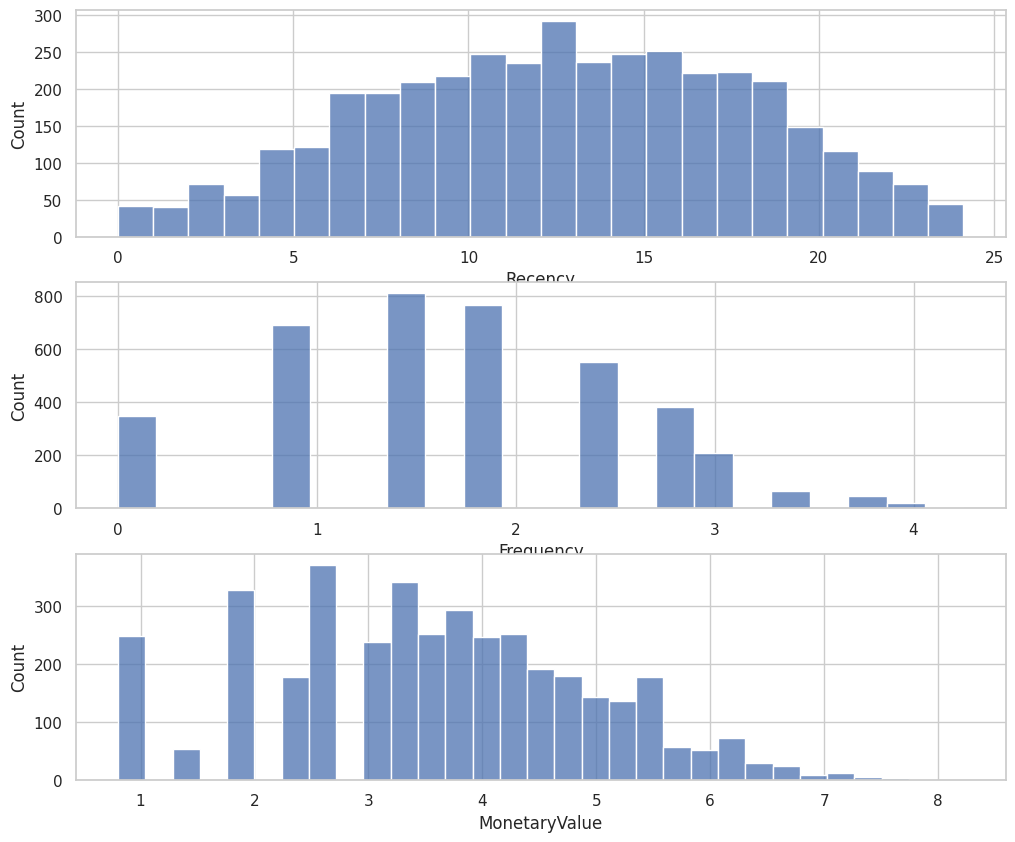

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.histplot(customers_fix['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.histplot(customers_fix['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.histplot(customers_fix['MonetaryValue'])
# Show the plot
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)
# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(customers_normalized.std(axis = 0).round(2)) # [1. 1. 1.]

[ 0. -0. -0.]
[1. 1. 1.]


Elbow Method to number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

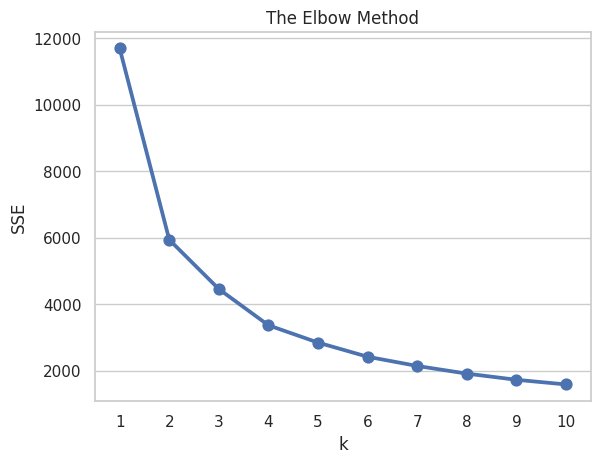

In [ ]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

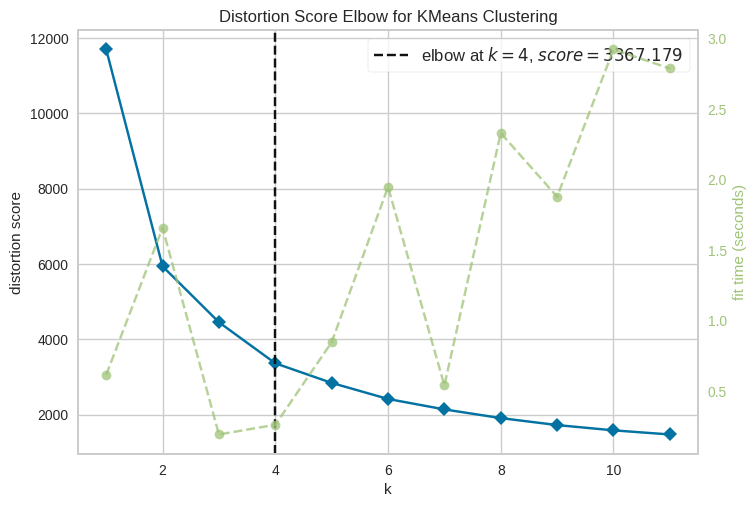

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(customers_normalized)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



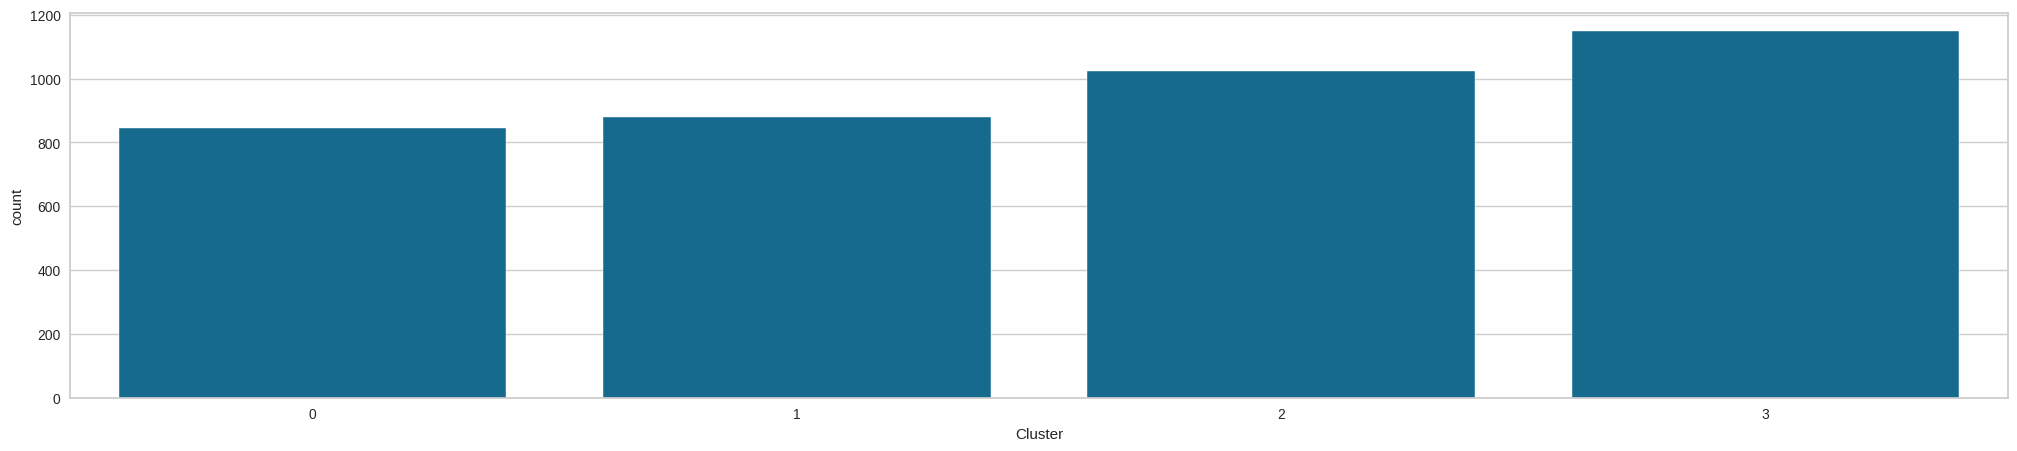

In [ ]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(customers_normalized)
model.labels_.shape
customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="Cluster", data=customers)

<ipython-input-102-7a0400d788cf>:3: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.



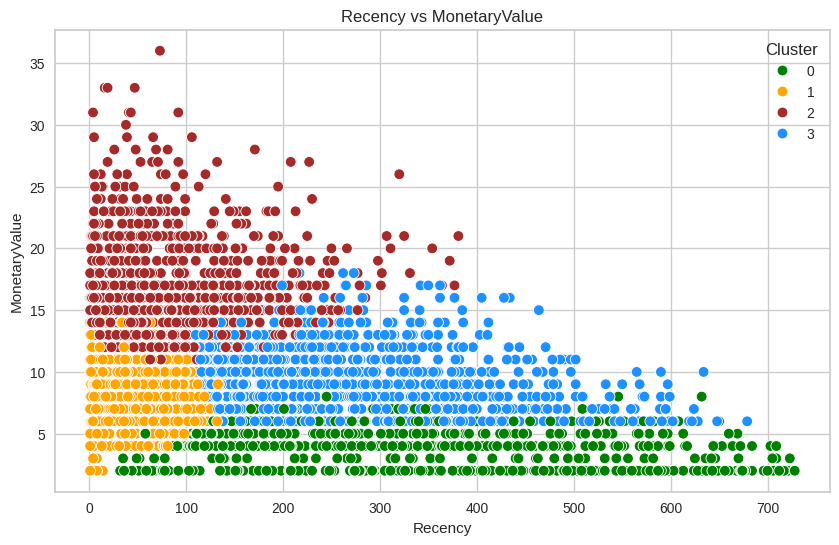

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Recency',y = 'MonetaryValue',hue="Cluster",
                 palette=['green','orange','brown','dodgerblue','red'],
                legend='full',data = customers  ,s = 60 )
plt.xlabel('Recency')
plt.ylabel('MonetaryValue')
plt.title('Recency vs MonetaryValue')
plt.show()

<ipython-input-103-699c5feefc72>:3: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.



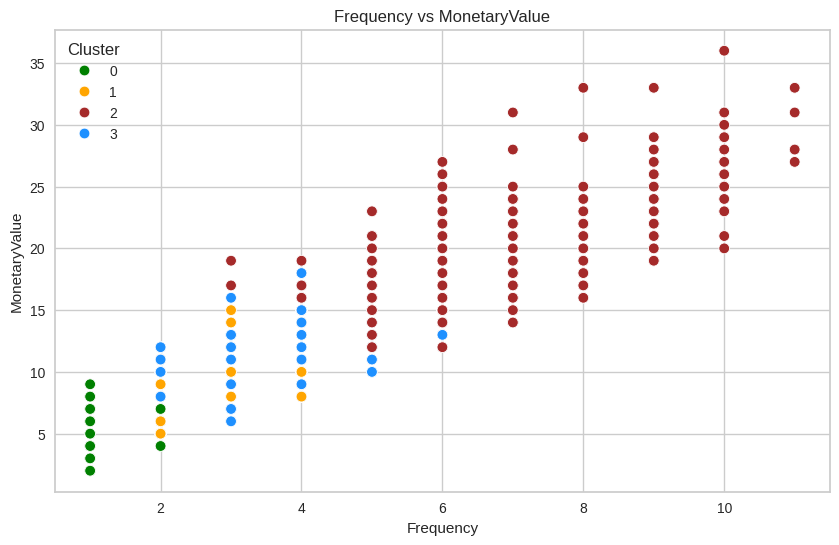

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Frequency',y = 'MonetaryValue',hue="Cluster",
                 palette=['green','orange','brown','dodgerblue','red'],
                legend='full',data = customers  ,s = 60 )
plt.xlabel('Frequency')
plt.ylabel('MonetaryValue')
plt.title('Frequency vs MonetaryValue')
plt.show()

<ipython-input-104-5c352770a143>:3: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.



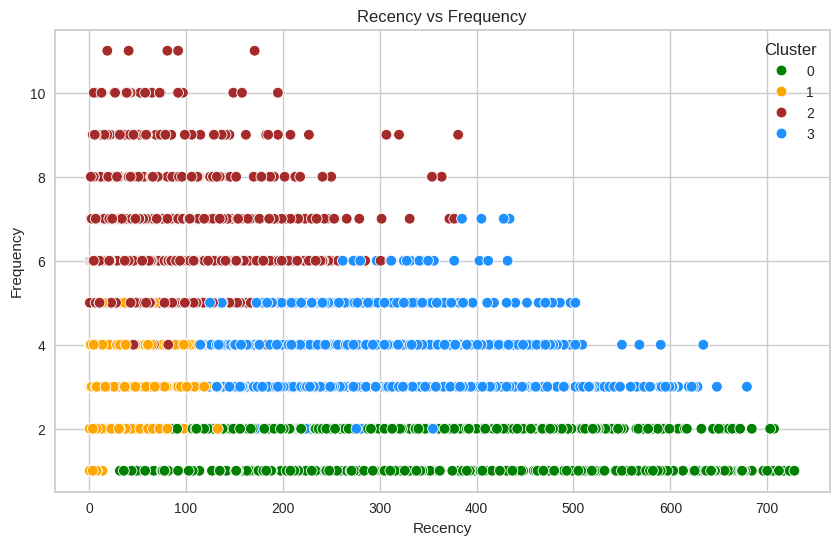

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Recency',y = 'Frequency',hue="Cluster",
                 palette=['green','orange','brown','dodgerblue','red'],
                legend='full',data = customers  ,s = 60 )
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



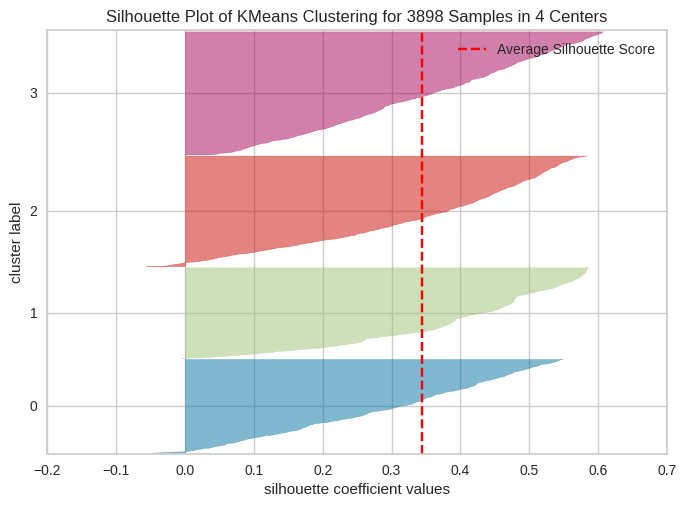

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=4, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(customers_normalized)
visualizer.show()
plt.show()

In [ ]:
print(silhouette_score(customers_normalized, model.labels_))

0.34476530304696695


In [ ]:
model.labels_

array([2, 3, 3, ..., 1, 2, 3], dtype=int32)

In [ ]:
customers.groupby(['Cluster']).count()

Recency  Frequency  MonetaryValue
Cluster                                   
0            845        845            845
1            879        879            879
2           1025       1025           1025
3           1149       1149           1149

In [ ]:
customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         52.44      3.31          8.53   874
1        343.46      1.61          3.90   845
2         86.98      6.22         16.66  1031
3        269.89      3.74          9.44  1148

In [ ]:
customers.Cluster.value_counts()

Cluster
3    1148
2    1031
0     874
1     845
Name: count, dtype: int64

<Axes: xlabel='Attribute', ylabel='Value'>

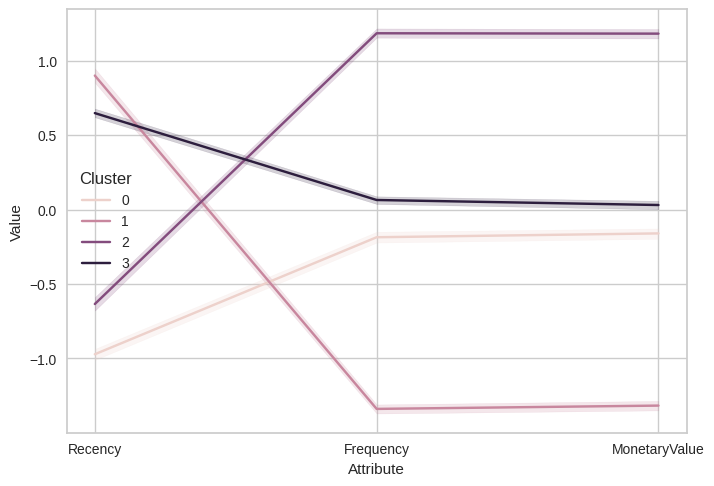

In [ ]:
# Create the dataframe
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
sns.lineplot(x = 'Attribute', y= 'Value', hue='Cluster', data=df_nor_melt)

# Testing the data with Hierarchical agglomerative clustering

In [ ]:
data1 = members.copy()
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data1)
df2=data1[["Recency","Frequency","MonetaryValue"]]
df2["label"] = y_hc
df2

Recency  Frequency  MonetaryValue  label
Member_number                                          
1000                36          5             13      2
1001               243          5             12      0
1002               123          4              8      0
1003               324          4              8      1
1004                29          8             21      2
...                ...        ...            ...    ...
4996                37          3             10      2
4997                 4          2              6      2
4998                78          1              2      2
4999                 5          6             16      2
5000               324          3              7      1

[3898 rows x 4 columns]

In [ ]:
# Check the size of the clusters
h_clust_sizes = df2.groupby('label').size().to_frame()
h_clust_sizes.columns = ["Hierarchical"]
h_clust_sizes

Hierarchical
label              
0              1527
1               743
2              1483
3               145

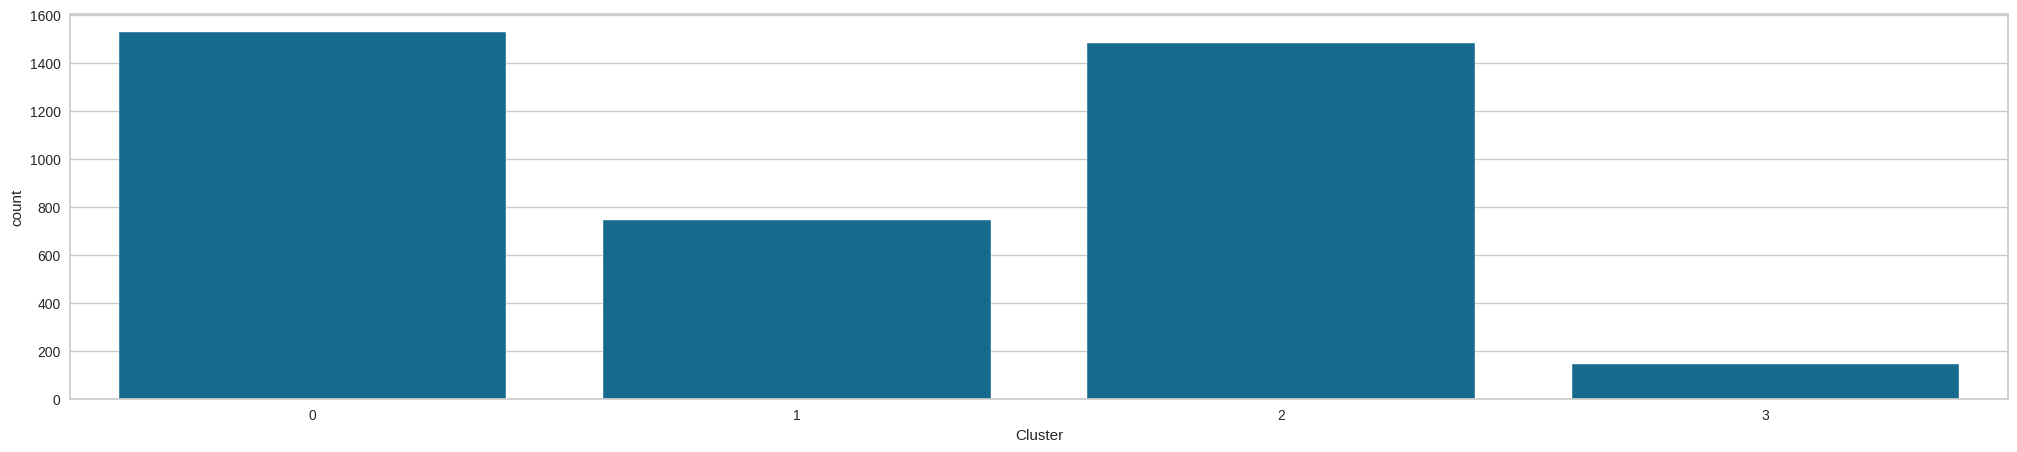

In [ ]:
customers["Cluster"] = hc.labels_
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="Cluster", data=customers)

In [ ]:
customers.groupby(['Cluster']).count()

Recency  Frequency  MonetaryValue
Cluster                                   
0           1527       1527           1527
1            743        743            743
2           1483       1483           1483
3            145        145            145

In [ ]:
customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         52.44      3.31          8.53   874
1        343.46      1.61          3.90   845
2         86.98      6.22         16.66  1031
3        269.89      3.74          9.44  1148

<Axes: xlabel='Attribute', ylabel='Value'>

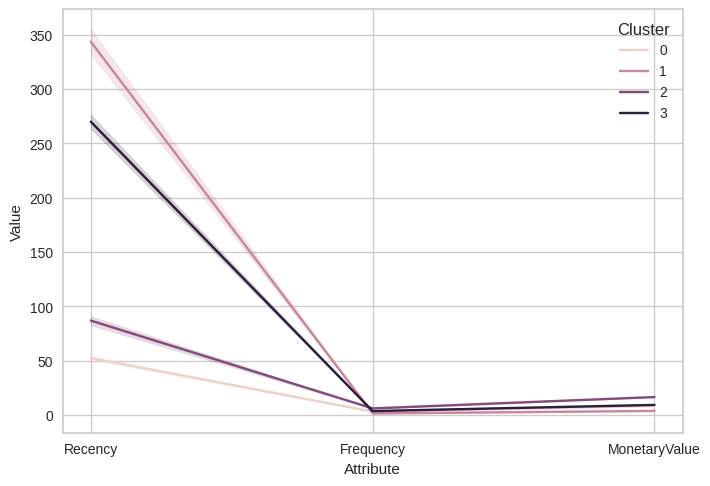

In [ ]:
# Create the dataframe
df_normalized = pd.DataFrame(customers, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
sns.lineplot(x = 'Attribute', y= 'Value', hue='Cluster', data=df_nor_melt)

<ipython-input-118-4fc5e82f8107>:3: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.



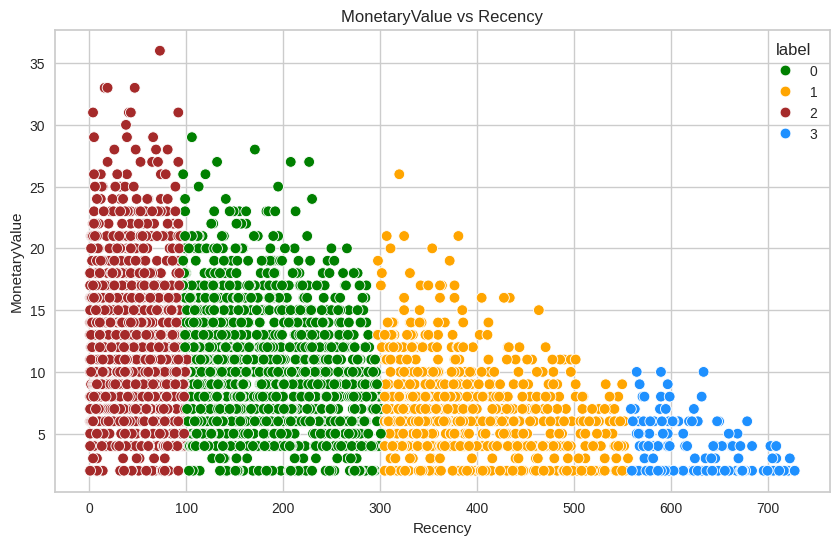

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Recency',y = 'MonetaryValue',hue="label",
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df2  ,s = 60 )
plt.xlabel('Recency')
plt.ylabel('MonetaryValue')
plt.title('MonetaryValue vs Recency')
plt.show()

<ipython-input-122-a62b4ae3c34a>:3: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.



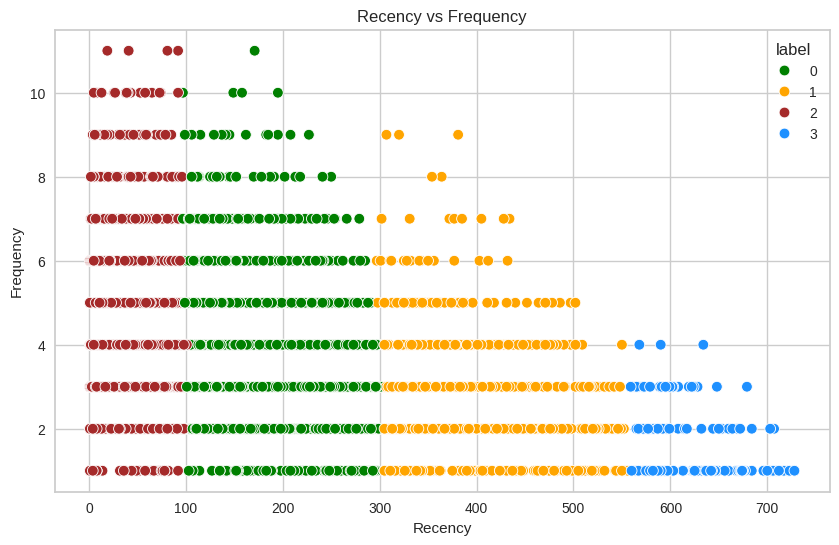

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Recency',y = 'Frequency',hue="label",
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df2  ,s = 60 )
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency')
plt.show()

<ipython-input-124-f2c67f464c64>:3: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.



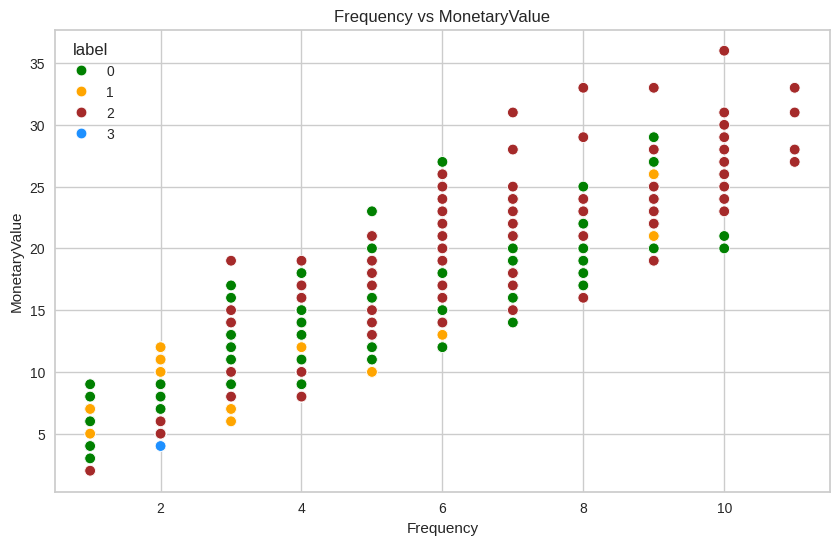

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Frequency',y = 'MonetaryValue',hue="label",
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df2  ,s = 60 )
plt.xlabel('Frequency')
plt.ylabel('MonetaryValue')
plt.title('Frequency vs MonetaryValue')
plt.show()

In [ ]:
print(silhouette_score(data1, y_hc))

0.5438938836557567


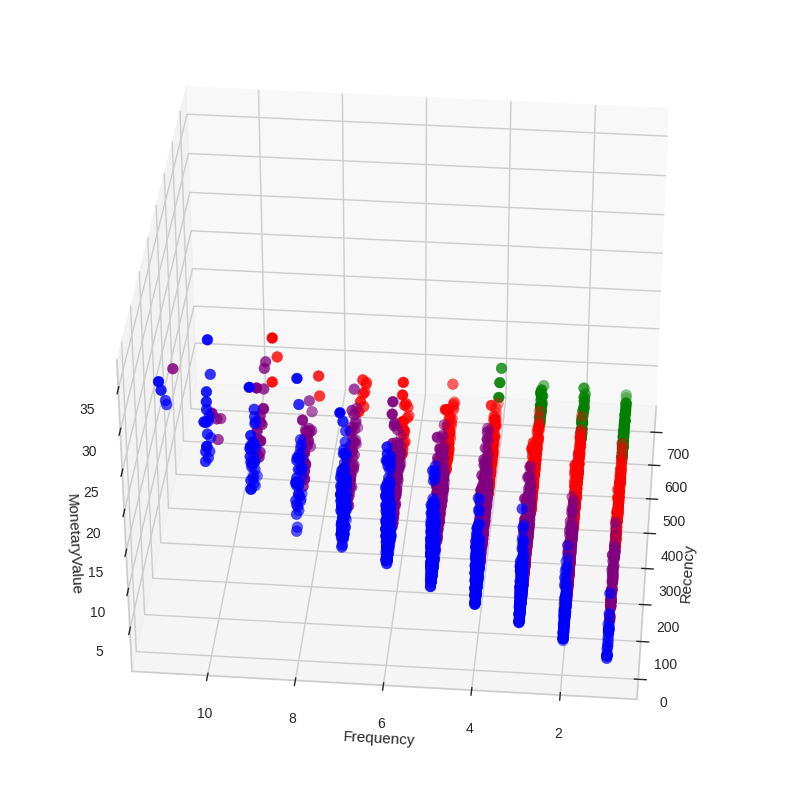

In [ ]:
df = df2.copy()
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Recency[df.label == 0], df["Frequency"][df.label == 0], df["MonetaryValue"][df.label == 0], c='purple', s=60)
ax.scatter(df.Recency[df.label == 1], df["Frequency"][df.label == 1], df["MonetaryValue"][df.label == 1], c='red', s=60)
ax.scatter(df.Recency[df.label == 2], df["Frequency"][df.label == 2], df["MonetaryValue"][df.label == 2], c='blue', s=60)
ax.scatter(df.Recency[df.label == 3], df["Frequency"][df.label == 3], df["MonetaryValue"][df.label == 3], c='green', s=60)
ax.scatter(df.Recency[df.label == 4], df["Frequency"][df.label == 4], df["MonetaryValue"][df.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Recency")
plt.ylabel("Frequency")
ax.set_zlabel('MonetaryValue')
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df2, x='Recency', y='Frequency', z='MonetaryValue',
              color= 'label')
fig.show()